In [7]:
%matplotlib inline
from netCDF4 import Dataset as ncread
import netCDF4 as nc
import numpy as np
from scipy.io import loadmat
import pandas as pd
import h5py
import math
import pandas as pd
from datetime import datetime
from itertools import product
from cftime import DatetimeNoLeap
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
root_data='/s2s/mpyrina/Lorentz_Workshop/Data/'
root_results='/s2s/mpyrina/Lorentz_Workshop/Results/'

In [24]:
# SST data
file = xr.open_mfdataset(root_data+'sst_1959-2021_1_12_daily_2.0deg.nc',
                          combine='by_coords',parallel=True)
sst_dim = file.sel(longitude=slice(40,180),latitude=slice(20,-10)) #40,-20
lon = sst_dim.coords['longitude'].values
lat = sst_dim.coords['latitude'].values
nlon = len(lon)
nlat = len(lat)

sst_series = sst_dim.sel(time=sst_dim.time.dt.year.isin([np.arange(1980,2022)])).rolling(time=7, center=False).mean(skipna=True) #.dropna(dim='time')
sst_series.sizes

Frozen({'time': 15341, 'longitude': 70, 'latitude': 16})

/home/mpyrina/.local/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing with an out-of-order index is generating 42 times more chunks
  return self.array[key]


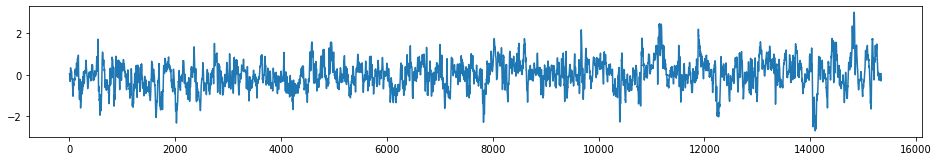

In [17]:
# Anomalies

sst_anom_series = sst_series.groupby("time.dayofyear") - sst_series.groupby("time.dayofyear").mean("time",skipna=True)
fig, axs = plt.subplots(1, figsize=plt.figaspect(0.15))

plt.plot(sst_anom_series['sst'].values[:,0,10])

Text(0.5, 1.03, 'sst daily anomaly')

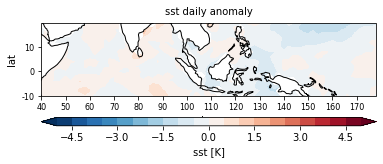

In [22]:
# plot SST
import cartopy.crs as ccrs
import cartopy.feature as cf
color = 'RdBu_r' 
colorbarMin = -5
colorbarMax = 5
colorspace = 0.5
level = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)
ax = plt.axes(projection=ccrs.cartopy.crs.PlateCarree(central_longitude=110))
h = ax.contourf(lon, lat, sst_anom_series['sst'][6,:,:], level, transform=ccrs.PlateCarree(), cmap=color,extend='both')
cbar = plt.colorbar(h, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='sst [K]'
cbar.set_label(label=colorLabel,fontsize=10)
#Add in the coordinate system:
long = np.arange(40, 180, 10)
latg = np.arange(-10, 20, 10)
ax.set_xticks(long, crs=ccrs.PlateCarree());
ax.set_yticks(latg, crs=ccrs.PlateCarree());
ax.set_xticklabels(long,fontsize=8)
ax.set_yticklabels(latg,fontsize=8)
ax.set_ylabel('lat',fontsize=10);
ax.set_xlabel('lon',fontsize=10);

#Add in the continents
#define the land, the color (#AAAAAA) and the resolution (110m)
feature2 = cf.NaturalEarthFeature(
    name='coastline', category='physical',   #name='land' for ploting the ocean surface
    scale='110m',
    facecolor='none',edgecolor='#000000') #facecolor=#AAAAAA with no edgecolor parameter for ploting the ocean surface

ax.add_feature(feature2)

#Set a title for your map:
title = 'sst daily anomaly'
plt.title(title,fontsize=10, y=1.03)